In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
!ln -s /content/drive/MyDrive

ln: failed to create symbolic link './MyDrive': Input/output error


In [51]:
#Navigate to /content/drive/MyDrive/Project
%cd /content/drive/MyDrive/Project

/content/drive/MyDrive/Project


In [52]:
import warnings
warnings.filterwarnings("ignore")
import os
import shutil
import glob

In [53]:
TRAIN_DIR ="./DATASET"
ORG_DIR ="/content/drive/MyDrive/train"
CLASS=['Forest Fire','Gas Stove','Match stick']

for C in CLASS:
  DEST=os.path.join(TRAIN_DIR,C)
  
  for img_path in glob.glob(os.path.join(ORG_DIR,C)+""):
    SRC=img_path

    shutil.copy(SRC,DEST)

In [54]:
os.listdir("/content/drive/MyDrive/train")

['Forest fire', 'Match Stick', 'Gas stove']

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3,preprocess_input
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array


In [56]:
base_model=InceptionV3(input_shape=(300,300,3),include_top=False)

In [57]:
for layer in base_model.layers:
  layer.trainable=False

In [58]:
X=Flatten()(base_model.output)
X=Dense(units=3,activation='sigmoid')(X)

#Final model
model=Model(base_model.input , X)

#Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#Summary
model.summary() 

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 149, 149, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_188 (Batch  (None, 149, 149, 32  96         ['conv2d_188[0][0]']             
 Normalization)                 )                                                           

In [59]:
train_datagen=ImageDataGenerator(featurewise_center=True,
                                 rotation_range=0.4,
                                 width_shift_range=0.3,
                                 horizontal_flip=True,
                                 preprocessing_function=preprocess_input,
                                 zoom_range=0.4,
                                 shear_range=0.4)

train_data=train_datagen.flow_from_directory(directory='/content/drive/MyDrive/train',
                                             target_size=(300,300),
                                             batch_size=40)

Found 220 images belonging to 3 classes.


In [60]:
train_data.class_indices

{'Forest fire': 0, 'Gas stove': 1, 'Match Stick': 2}

In [61]:
t_img,label=train_data.next()

In [62]:
t_img.shape

(40, 300, 300, 3)

In [63]:
def plotImages(img_arr,label):
  """
  imput:imaages array
  output:plot images
  """

  for idx,img in enumerate(img_arr):

    if idx<=3:
      plt.figure(figsize=(10,10))
      plt.imshow(img)
      plt.title(img.shape)
      plt.axis=False
      plt.show()

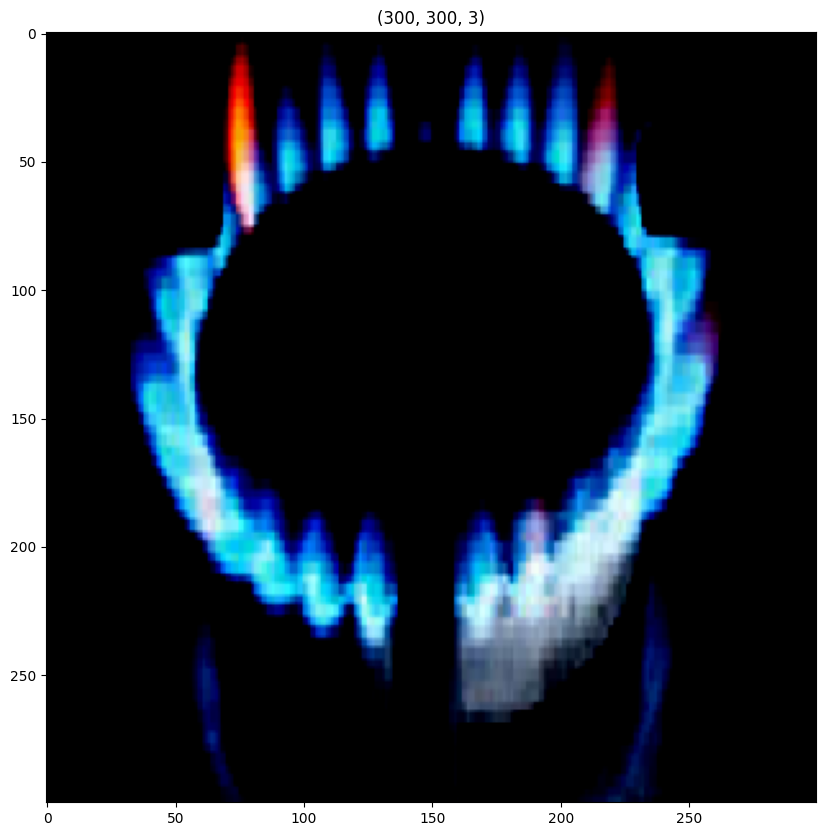

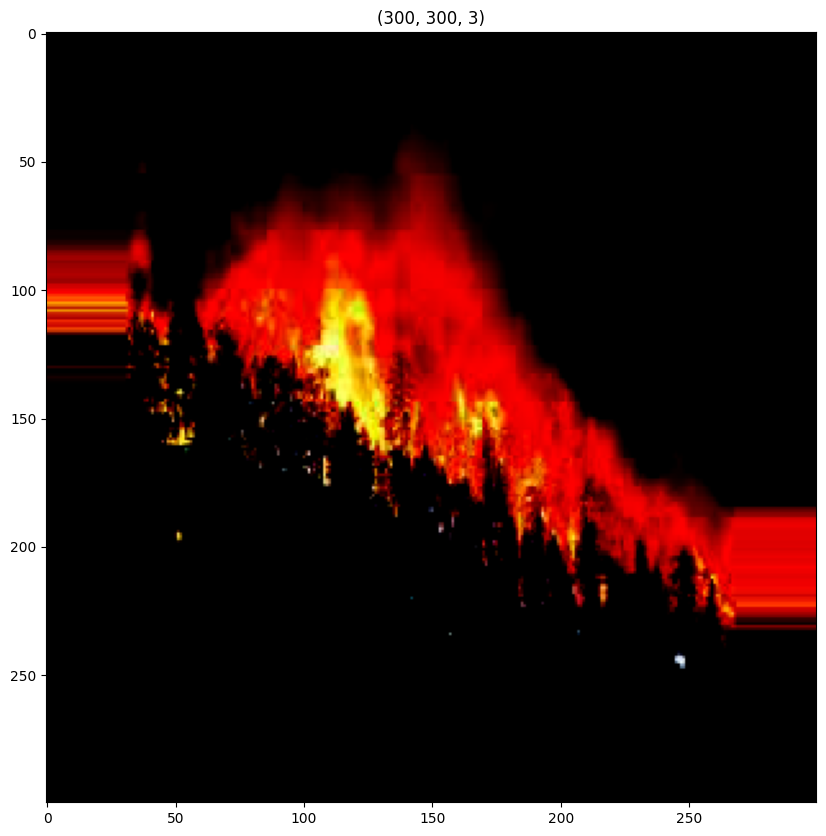

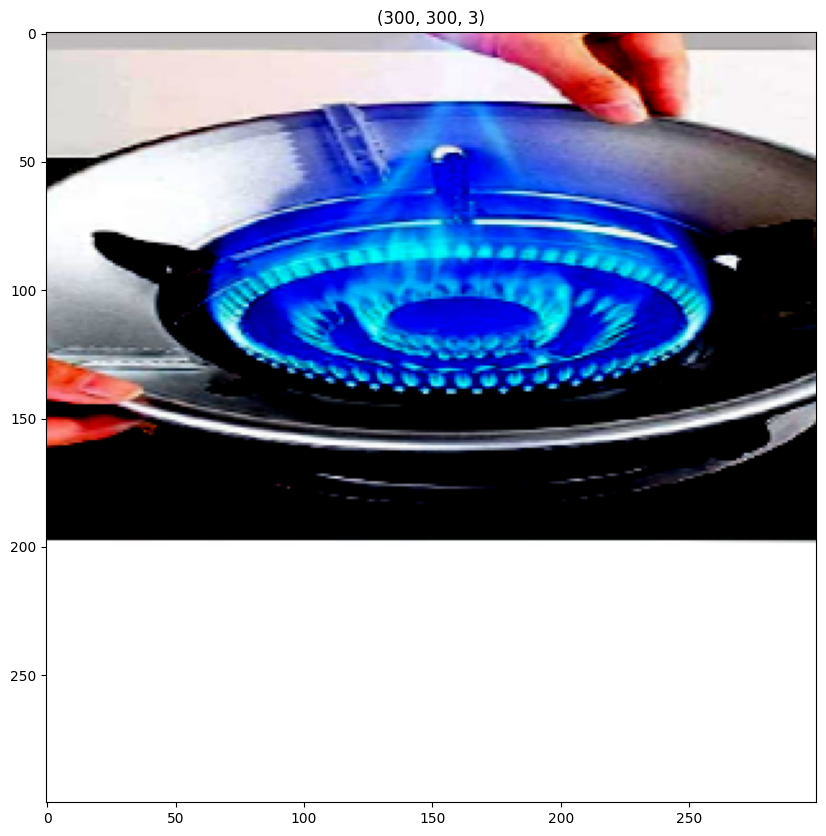

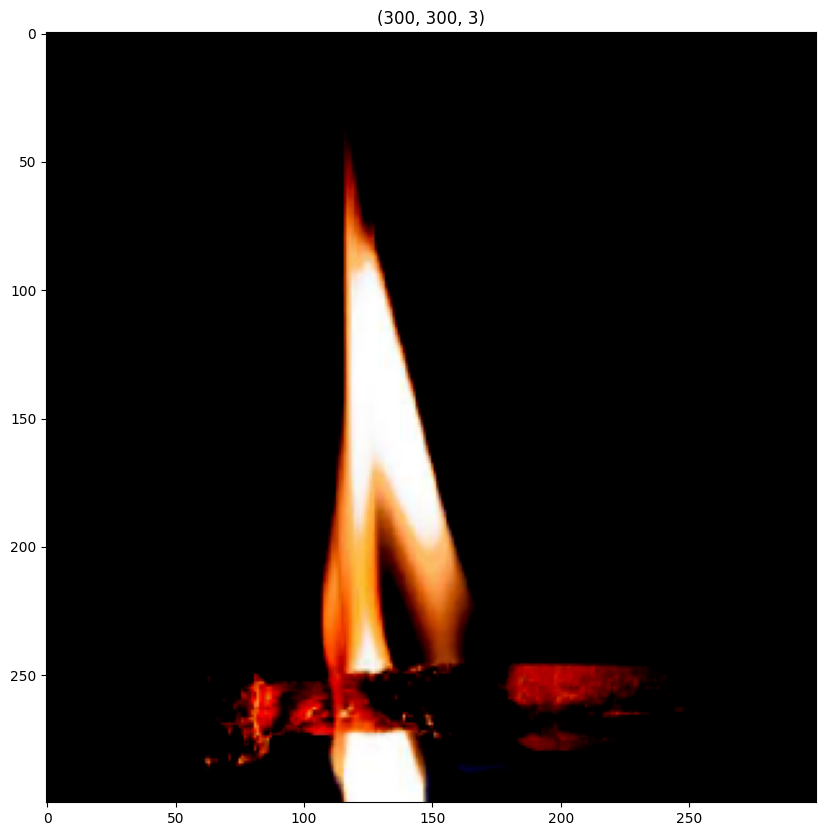

In [64]:
plotImages(t_img,label)

In [65]:
from keras.callbacks import ModelCheckpoint ,EarlyStopping
mc=ModelCheckpoint(filepath="./best_model(1).h5",
                   monitor="accuracy",
                   verbose=1,save_best_only=True)

es=EarlyStopping(monitor="accuracy",
                 min_delta=0.01,
                 patience=5,
                 verbose=1)

cb=[mc,es]

In [68]:
his =model.fit_generator(
    train_data,
    steps_per_epoch=32,
    epochs=25)
    #callbacks=cb)


Epoch 1/25
 6/32 [====>.........................] - ETA: 3:19 - loss: 0.9304 - accuracy: 0.8955

32/32 [==============================] - 46s 1s/step - loss: 0.9304 - accuracy: 0.8955


In [69]:
model.save('/content/MyDrive/Project/mymodel.h5')

In [71]:
from keras.models import load_model
model=load_model("/content/MyDrive/Project/mymodel.h5")

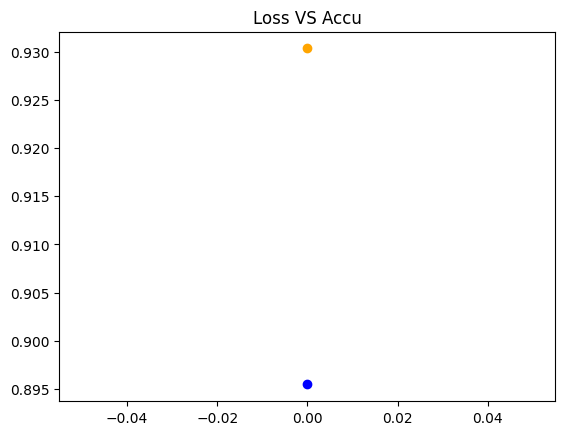

In [72]:
h=his.history
h.keys()

plt.plot(h['loss'],'go--',c="orange")
plt.plot(h['accuracy'],'go--',c="blue")

plt.title("Loss VS Accu")
plt.show()